# Plot Proper Motion Diagram

Examples of proper motion diagram to make the distinction between an object from the background or comoving with the star for the targets from the sample Super-Earth survey:

Based on Arthur Vigans's script "proper_motion.py". 

Modifications: 

June 1st, 2021 - Célia Desgrange

-> understood ANDROMEDA charac convention

January 13rd, 2022 - Célia Desgrange

-> let's start the automatization...
1st) find the same detections among several epochs

March 30th, 2022 - Célia Desgrange

-> well, messing it up. (well, no, but, should adapt it to fully automatize it... yiha. and especially adapt to table results, containing a mixture of ANDROMEDA and SpeCal (but it is uniformized))

## Import packages

In [2]:
from import_packages_generic import *
from import_packages_PMD import *
from import_functions_generic import *
from import_functions_PMD import *
from import_initialization_generic_variables import *
from import_initialization_dataframes import *
from import_initialization_CaPMD_variables import *

In [3]:
help(find_proper_motion_between_2epochs)

Help on function find_proper_motion_between_2epochs in module import_functions_PMD:

find_proper_motion_between_2epochs(target, epochs, unit='mas', pixarc=12.25)
    Return the proper motion expected for background contaminants between two epochs
        Inputs:
            'target' (type=string):
                    example 'HD154088'
            'epochs' (type=list/array of strings):
                    example np.array(['2017-06-21', '2019-07-22', '2021-07-04'])
            (optional below)
            'unit' (type=string): precise in which units to return the proper motion
                    Default is in 'mas'. Other option implemented: 'pixel'.
            'pixarc' (type=float): in case the 'unit' is to 'pixel', precise what is
                    the factor of conversion. Default is 12.25 mas, corresponding to
                    the platescale from the SPHERE-IRDIS instrument.



In [4]:
L = time.localtime()
date = "{}-{}-{}".format(L[0],L[1],L[2],L[3],L[4],L[5])

saving_dir = 'figs/fig_PMD_v{}'.format(date)
os.makedirs(saving_dir,exist_ok=True)

# Initialization

In [6]:
# Error
# define global error budget in RA, DEC
# add the pupil offset error of theta = 0.1 deg; depends on sep (separation) and differs for ra/dec
# error in ra: dra**2 =  [sin(theta)*dsep]**2 + [sep*cos(theta)*dtheta]**2 
# error in dec: ddec**2 =  [cos(theta)*dsep]**2 + [sep*sin(theta)*dtheta]**2 
theta     = 135.99 * np.pi/180 # 0.1 error pupil offset converted in rad
theta_err = 0.11 * np.pi/180 

### Initialize for all the detections in the Super-Earth survey the magnitude in H2,H3 and K1,K2-bands

Note: all detections are from specal charac files or andromeda charac files, which have been summarized in global tables 

In [7]:
# Initialize SpeCal variables
prefix = '/Users/user/Documents/desgrange/work/code/GitHub/projects/RAISES/derive_and_plot_candidates/tables/'
algo = 'specal+andro'
dF = pd.read_csv(prefix+'all_detections_{}_final_CMD_status.csv'.format(algo),sep=',')

# Plot Proper Motion Diagramm

In [8]:
target = 'HD85512'
target_DC_all = dF_obs[target==dF_obs['target name']]['target name DC']
target_DC_all

0     HIP 48331
1     HIP 48331
40    HIP 48331
41    HIP 48331
74    HIP 48331
75    HIP 48331
78    HIP 48331
79    HIP 48331
Name: target name DC, dtype: object

# Peering into one targeted system

### A la mano

In [9]:
# A la mano GJ 832

target_DC = target_DC_all.iloc[0]

# initialize lists
##EPOCH_all, RA_all, DEC_all =[ '2017-05-27','2017-06-21','2017-06-27','2017-07-03'], [481.2,429,429,429], [197.7,291,291,291]
RA_ERR_all, DEC_ERR_all, X_all, Y_all = [10,10,10,10], [10,10,10,10], [30, 37,37,37], [121, 133.5,133.5]
EPOCH_all =  ['2021-06-21', '2021-06-27', '2021-07-03']
RA_all, DEC_all = [183.75,  104.125,  79.625], [  0.,     79.625, 104.125]
X_all, Y_all = [496.5, 503.,  505. ], [511.5, 518.,  520. ]

SEP_all, SEP_ERR_all, PA_all, PA_ERR_all = [distance(RA_all[0],DEC_all[0],0,0,1),distance(RA_all[1],DEC_all[1],0,0,1),distance(RA_all[1],DEC_all[1],0,0,1),distance(RA_all[1],DEC_all[1],0,0,1)], [15,15,15,15], [68,68,68,68], [30,30,30,30],

print('Target: {} (DC name: {}) \nNumber detections: {}'.format(target,target_DC, len(EPOCH_all)))
print('Epochs:', EPOCH_all[0])

print('RA:', RA_all , '\nDEC:', DEC_all) 
print('SEP:', SEP_all , '\nPA:', PA_all) 
#print('X', X_all , '\nY', Y_all)

Target: HD85512 (DC name: HIP 48331) 
Number detections: 3
Epochs: 2021-06-21
RA: [183.75, 104.125, 79.625] 
DEC: [0.0, 79.625, 104.125]
SEP: [183.75, 131.08072417407527, 131.08072417407527, 131.08072417407527] 
PA: [68, 68, 68, 68]


In [10]:
if target == 'GJ832' :
    pixarc = pixarc_ifs
    EPOCH_all = np.array(['2017-06-21','2017-07-03'])
    X_all, Y_all = np.array([27,80.5]), np.array([110,101.5])
    RA_all, DEC_all = -(X_all - 94.5)*pixarc, (Y_all - 94.5)*pixarc
    RA_ERR_all, DEC_ERR_all = np.array([7,7]), np.array([7,7])
    SEP_all = np.sqrt(RA_all**2 + DEC_all**2)
    SEP_ERR_all = np.sqrt(RA_ERR_all**2 + DEC_ERR_all**2)
    print('RA:', RA_all , '\nDEC:', DEC_all) 

## Quasi-Automatized 

### Detections details
Are there any detections in H2 and K1 ? If yes, in which epoch, at which magnitudes and at which pixels???

In [14]:
dF.head()

,index,details,target,epoch,filter,coord_x_pix,coord_y_pix,ra_mas,ra_err_mas,ra_err_fit_mas,...,mag_abs_err_channel1,mag_abs_channel2,mag_abs_err_channel2,color,color_err,mag_lim_channel1,mag_lim_channel2,color_uplim,robust_detection_channel2,status_CMD
0,0.0,BD061339 2018-11-24 H23,BD061339,2018-11-24,H23,968.8,752.7,-2998.8,4.7,1.2,...,0.065,18.860,0.066,-0.002,0.093,15.925,15.889,-2.010,1,background
1,1.0,BD061339 2018-11-24 H23,BD061339,2018-11-24,H23,392.0,876.0,4067.1,7.5,3.0,...,0.100,19.885,0.096,-0.038,0.139,15.928,15.951,-1.083,1,background
2,0.0,GJ176 2018-10-08 H23,GJ176,2018-10-08,H23,409.4,572.0,3853.6,6.7,0.8,...,0.070,18.974,0.071,-0.032,0.100,16.166,16.176,-3.173,1,background
3,1.0,GJ229 2018-11-27 H23,GJ229,2018-11-27,H23,705.4,299.2,228.1,15.8,10.9,...,0.056,16.612,0.056,-1.761,0.079,17.886,17.922,-8.658,1,promising
4,0.0,GJ229 2018-11-27 H23,GJ229,2018-11-27,H23,444.4,712.3,3425.0,5.0,1.0,...,0.061,21.392,0.061,0.018,0.086,17.693,17.642,-1.819,1,background


In [18]:
dF.columns

Index(['index', 'details', 'target', 'epoch', 'filter', 'coord_x_pix',
       'coord_y_pix', 'ra_mas', 'ra_err_mas', 'ra_err_fit_mas', 'dec_mas',
       'dec_err_mas', 'ra_pix', 'dec_pix', 'dec_err_fit_mas', 'sep_mas',
       'sep_err_mas', 'sep_err_fit_mas', 'pa_deg', 'pa_err_deg',
       'pa_err_fit_deg', 'tn_deg', 'tn_err_deg', 'tn_err_ra_mas',
       'tn_err_dec_mas', 'pupil_offset_deg', 'pupil_offset_err_deg',
       'pupil_offset_err_ra_mas', 'pupil_offset_err_dec_mas',
       'waffle_err_radec_mas', 'platescale_maspix', 'platescale_err_maspix',
       'platescale_err_ra_mas', 'platescale_err_dec_mas', 'pipeline', 'algo',
       'detection_number', 'version', 'contrast_channel1', 'contrast_channel2',
       'contrast_err_channel1', 'contrast_err_channel2',
       'contrast_err_fit_channel1', 'contrast_err_fit_channel2',
       'contrast_err_seq_channel1', 'contrast_err_seq_channel2',
       'contrast_err_psf_channel1', 'contrast_err_psf_channel2',
       'mag_channel1', 'mag_chan

In [19]:
TARGET = dF['target']

In [11]:
target_DC = target_DC_all.iloc[0]

# initialize lists
EPOCH_all, RA_all, DEC_all, RA_ERR_all, DEC_ERR_all, X_all, Y_all = [], [], [], [], [], [], []
SEP_all, SEP_ERR_all, PA_all, PA_ERR_all = [], [], [], []
SNR_all = []
cond = (TARGET_MAG_H23 == target) 
#cond_interesting = (MAG_ABS_H2_companion < 16)
#cond = np.logical_and(cond,cond_interesting)

y = MAG_ABS_H2_companion[cond]
x = MAG_ABS_H2_companion[cond]-MAG_ABS_H3_companion[cond]

file_temporary = NAME_H23[cond]
EPOCH_all.append(np.array([select_string_between_characs(file_temporary[i],'/','_',9) for i in range(len(file_temporary))]))

print('Target: {} (DC name: {}) \nNumber detections: {}'.format(target,target_DC, len(EPOCH_all)),
      'including', len(TARGET_MAG_H23[cond]), 'interesting cases from a CMD point of view\n')
print('Epochs:', EPOCH_all[0])

#print('Mag Rel', np.array(MAG_REL_H2)[cond])
print('H2-H3:',x, '\nM_H2:',y)

RA_all.append(X_MAS_H23[cond]); DEC_all.append(Y_MAS_H23[cond])
RA_ERR_all.append(X_MAS_ERR_H23[cond]); DEC_ERR_all.append(Y_MAS_ERR_H23[cond])
SEP_all.append(SEP_H23[cond]); SEP_ERR_all.append(SEP_ERR_H23[cond])
SNR_all.append(SNR_H23[cond])


X_all.append(724-X_MAS_H23[cond]/pixarc_ird); Y_all.append(724+1+Y_MAS_H23[cond]/pixarc_ird)
print('RA:', RA_all , '\nDEC:', DEC_all) 
print('X', X_all , '\nY', Y_all)

NameError: name 'TARGET_MAG_H23' is not defined

In [6]:
# in K1
target_DC = target_DC_all.iloc[-1]

cond = (TARGET_MAG_K12 == target) 
condx0, condy0 = -1, 14

cond_interesting = np.logical_or(MAG_ABS_K1_companion < condy0, (MAG_ABS_K1_companion-MAG_ABS_K2_companion)<condx0) 
cond_interesting_target = np.logical_and(cond,cond_interesting)

y = MAG_ABS_K1_companion[cond]
x = MAG_ABS_K1_companion[cond]-MAG_ABS_K2_companion[cond]

file_temporary = NAME_K12[cond]
EPOCH_all.append(np.array([select_string_between_characs(file_temporary[i],'/','_',9) for i in range(len(file_temporary))]))
#EPOCH_all_1D_target = np.concatenate(np.array(EPOCH_all))


print('Target: {} (DC name: {}) \nNumber detections: {}'.format(target,target_DC, len(EPOCH_all[1])),
      'including', len(TARGET_MAG_K12[cond_interesting_target]), 
      'interesting cases from a CMD point of view in the epochs\n') 
      #len(EPOCH_all_1D_target[cond_interesting_target]))
print('Epochs:', '\n H23 n=',len(EPOCH_all[0]), EPOCH_all[0], 
      '\n K12 n=',len(EPOCH_all[1]), EPOCH_all[1])
#print('K1-K2:', len(x), x, '\nM_K1:',len(y), y)

RA_all.append(X_MAS_K12[cond]); DEC_all.append(Y_MAS_K12[cond])
RA_ERR_all.append(X_MAS_ERR_K12[cond]); DEC_ERR_all.append(Y_MAS_ERR_K12[cond])
X_all.append(724-X_MAS_K12[cond]/pixarc_ird); Y_all.append(724+1+Y_MAS_K12[cond]/pixarc_ird)
SEP_all.append(SEP_K12[cond]); SEP_ERR_all.append(SEP_ERR_K12[cond])
SNR_all.append(SNR_K12[cond])


Target: HD85512 (DC name: HIP 48331) 
Number detections: 3 including 0 interesting cases from a CMD point of view in the epochs

Epochs: 
 H23 n= 3 ['2017-12-30' '2017-04-01' '2017-04-01'] 
 K12 n= 3 ['2020-01-03' '2019-11-25' '2019-11-25']


In [7]:
# more tests in case there are some interesting candidates from a CMD point of view
print(724-X_MAS_K12[cond_interesting_target]/pixarc_ird)
print(724+1+Y_MAS_K12[cond_interesting_target]/pixarc_ird)
print(SNR_K12[cond_interesting_target])

EPOCH_all_target = []
file_temporary = NAME_K12
EPOCH_all_target.append(np.array([file_temporary[i][89:99] for i in range(len(file_temporary))]))
np.concatenate(np.array(EPOCH_all_target))[cond_interesting_target]

[]
[]
[]


array([], dtype='<U10')

In [8]:
## Find common target between different epochs

In [71]:
# Initialize inputs
target = 'GJ674'
EPOCH_UNIQUE = np.unique(np.concatenate(np.array(EPOCH_all)))
print(EPOCH_UNIQUE)
epochs = EPOCH_UNIQUE
unit = 'pixel'

# Run functions
pm_ra_yr, pm_dec_yr = find_proper_motion_per_year(target,unit=unit)
pm_ra, pm_dec = find_proper_motion_between_2epochs(target,epochs,unit=unit)
print("Proper motion per year: {:.1f} {} {:.1f} {}".format(pm_ra_yr, unit, pm_dec_yr, unit))
print("Proper motion between the two epochs: {:.1f} {} {:.1f} {}".format(pm_ra, unit, pm_dec, unit))

['2017-04-01' '2017-12-30' '2019-11-25' '2020-01-03']


NameError: name 'Time' is not defined

In [28]:
£

SyntaxError: invalid character '£' (U+00A3) (1045158027.py, line 1)

In [29]:
if target == 'GJ674' :
    ra1, dec1 = X_all[0],  Y_all[0]
    ra2, dec2 = X_all[1], Y_all[1]
    dra, ddec = pm_ra, pm_dec #previously, when it was not automatized: 26, 89 #15, 42 
    tol=10
    
if target == 'HD154088' :
    ra1, dec1 = X_all[0],  Y_all[0]
    ra2, dec2 = X_all[1][5:], Y_all[1][5:]
    dra, ddec = pm_ra, pm_dec #previously, when it was not automatized: 26, 89 #15, 42 
    tol=10
    
print(ra1) ; print(dec1)
print(ra2) ; print(dec2)

NameError: name 'pm_ra' is not defined

In [30]:
INDEX1, INDEX_CLOSER, RA_CLOSER, DEC_CLOSER = closer_positions(ra1,dec1,ra2,dec2,dra=dra,ddec=ddec,tolerance=tol)

RA_CLOSER_idx_sort = np.argsort(RA_CLOSER)
RA1_idx_sort       = np.argsort(ra1)
RA2_idx_sort       = np.argsort(ra2)

print('Number of objects observed at least twice found: {} over {} in the last epoch'.format(len(INDEX_CLOSER),len(ra2)))
print(INDEX1)
print(INDEX_CLOSER)

#print(RA_CLOSER[RA_CLOSER_idx_sort])
#print(DEC_CLOSER[RA_CLOSER_idx_sort])
#print('\n',ra1[RA1_idx_sort])
#print(dec1[RA1_idx_sort])
#print('\n',ra2[RA2_idx_sort])
#print(dec2[RA2_idx_sort])


NameError: name 'dra' is not defined

In [9]:
# Everything should be given in array
EPOCH_all, RA_all, DEC_all = np.array(EPOCH_all),np.array(RA_all),np.array(DEC_all)
RA_ERR_all, DEC_ERR_all = np.array(RA_ERR_all),np.array(DEC_ERR_all)
SEP_all, SEP_ERR_all = np.array(SEP_all),np.array(SEP_ERR_all)

In [10]:
select_index_epochs = None ; select_index_epoch1 = None
index_filter = None

EPOCH, RA, DEC, RA_ERR, DEC_ERR = [], [], [], [], []
SEP, SEP_ERR = [], []

if target == 'HD85512': 
    # several candidates
    index_filter = [0,1]
    select_index_epochs = [[1,0],[1,0]]

elif target == 'HD154088' : 
    # several candidates
    # plot H23 1st epoch and K12 1st epoch and 2nd epoch
    index_filter = [0,1,1]
    select_index_epochs = [[18,23,1,27,28],[1,2,0,4,3],[4+7,4+16,4+2,4+18,4+14]]
    if 1 : # plot H23 1st epoch and K12 1st epoch
        index_filter = [0,1]
        select_index_epochs = [[0,1,2,3,5,8,10,12,16,18,21,23,24,27,28,29,30],
                               [5+np.array([0,1,2,4,9,3,7,5,11,6,8,15,19,17,13,14,10])]]
        
elif target == 'HD136352' : 
    # several candidates
    index_filter = [0,1]
    select_index_epochs = [[10,14,12,0,4,2,5],[0,3,1,2,4,5,6]]
    
elif target == 'GJ433' : 
    # attention, works well if SNR threshold is 3
    select_index_epoch1 = [1]
    select_index_epoch2 = [0]
elif target == 'GJ422' : 
    # attention, works well if SNR threshold is 3
    index_filter = [1,1]
    select_index_epochs = [[3,4,0,1,2,],[8,9,5,6,7,]]
    if 1:
        index_filter = [0,1,1]
        select_index_epochs = [[1,0], [3,4], [8,9]]
        
elif target == 'GJ682' :
    index_filter = [0,0]
    select_index_epochs = [[0,1,11,3,5,4,6,7,8],[12,13,14,15,16,17,18,19,20]]
    if 1:
        index_filter = [0,0,1]
        select_index_epochs = [[0,1,11,3,5,4],[12,13,14,15,16,17],[1,2,0,3,6,5]]

elif target == 'GJ674' :
    # the most automatized
    index_filter = [0,1]
    select_index_epochs = [INDEX1, INDEX_CLOSER]

else :
    print('Indicate indexes of detections which are present through several epochs or every detection would be considered with this sorting!')

if select_index_epoch1 != None and index_filter == None :
    EPOCH = np.array((EPOCH_all[0][select_index_epoch1],EPOCH_all[1][select_index_epoch2]))
    RA  = np.array((RA_all[0][select_index_epoch1], RA_all[1][select_index_epoch2])) 
    DEC = np.array((DEC_all[0][select_index_epoch1],DEC_all[1][select_index_epoch2]))
    RA_ERR  = np.array((RA_ERR_all[0][select_index_epoch1], RA_ERR_all[1][select_index_epoch2])) 
    DEC_ERR = np.array((DEC_ERR_all[0][select_index_epoch1],DEC_ERR_all[1][select_index_epoch2]))
    SEP = np.array((SEP_all[0][select_index_epoch1],SEP_all[1][select_index_epoch2]))
    SEP_ERR  = np.array((SEP_ERR_all[0][select_index_epoch1], SEP_ERR_all[1][select_index_epoch2])) 
    
elif select_index_epochs != None and index_filter != None :
    for i in range(len(index_filter)):
        EPOCH.append(EPOCH_all[index_filter[i]][select_index_epochs[i]])
        RA.append(RA_all[index_filter[i]][select_index_epochs[i]])
        DEC.append(DEC_all[index_filter[i]][select_index_epochs[i]])
        RA_ERR.append(RA_ERR_all[index_filter[i]][select_index_epochs[i]])
        DEC_ERR.append(DEC_ERR_all[index_filter[i]][select_index_epochs[i]])
        SEP.append(SEP_all[index_filter[i]][select_index_epochs[i]])
        SEP_ERR.append(SEP_ERR_all[index_filter[i]][select_index_epochs[i]])
        
    EPOCH = np.array((EPOCH))
    RA  = np.array(RA) 
    DEC = np.array(DEC)
    RA_ERR  = np.array(RA_ERR) 
    DEC_ERR = np.array(DEC_ERR)
    SEP = np.array(SEP)
    SEP_ERR = np.array(SEP_ERR)
    
elif target != 'GJ832' : 
    EPOCH = np.array((EPOCH_all[0],EPOCH_all[1]))
    RA  = np.array((RA_all[0], RA_all[1])) 
    DEC = np.array((DEC_all[0],DEC_all[1]))
    RA_ERR  = np.array((RA_ERR_all[0], RA_ERR_all[1])) 
    DEC_ERR = np.array((DEC_ERR_all[0],DEC_ERR_all[1]))
    SEP = np.array((SEP_all[0],SEP_all[1]))
    SEP_ERR = np.array((SEP_ERR_all[0],SEP_ERR_all[1]))
    
if target == 'HD85512' and 0: 
    EPOCH = EPOCH.flatten()
    RA  = RA.flatten()
    DEC = DEC.flatten()
    RA_ERR  = RA_ERR.flatten()
    DEC_ERR = DEC_ERR.flatten()
    SEP  = SEP.flatten()
    SEP_ERR = SEP_ERR.flatten()
    
    EPOCH = np.array([EPOCH]).transpose()
    RA  = np.array([RA]).transpose()
    DEC = np.array([DEC]).transpose()
    RA_ERR  = np.array([RA_ERR]).transpose()
    DEC_ERR = np.array([DEC_ERR]).transpose()
    SEP  = np.array([SEP]).transpose()
    SEP_ERR = np.array([SEP_ERR]).transpose()
    
    RA[3,0] = -RA[3,0]
    
elif target == 'GJ832' :    
    EPOCH = np.array([EPOCH_all]).transpose()
    RA  = np.array([RA_all]).transpose()
    DEC = np.array([DEC_all]).transpose()
    RA_ERR  = np.array([RA_ERR_all]).transpose()
    DEC_ERR = np.array([DEC_ERR_all]).transpose()
    SEP  = np.array([SEP_all]).transpose()
    SEP_ERR = np.array([SEP_ERR_all]).transpose()
    PA  = np.array([SEP_all]).transpose()
    PA_ERR = np.array([SEP_ERR_all]).transpose()
    
print('RA:\n', RA , '\nDEC:\n', DEC)

RA:
 [[-3515.49 -3983.89]
 [-4888.66  4905.12]] 
DEC:
 [[-2526.7  -2145.39]
 [-1255.42 -1180.48]]


### Plot these detections on the PMD

#### Declination vs Right Ascension

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


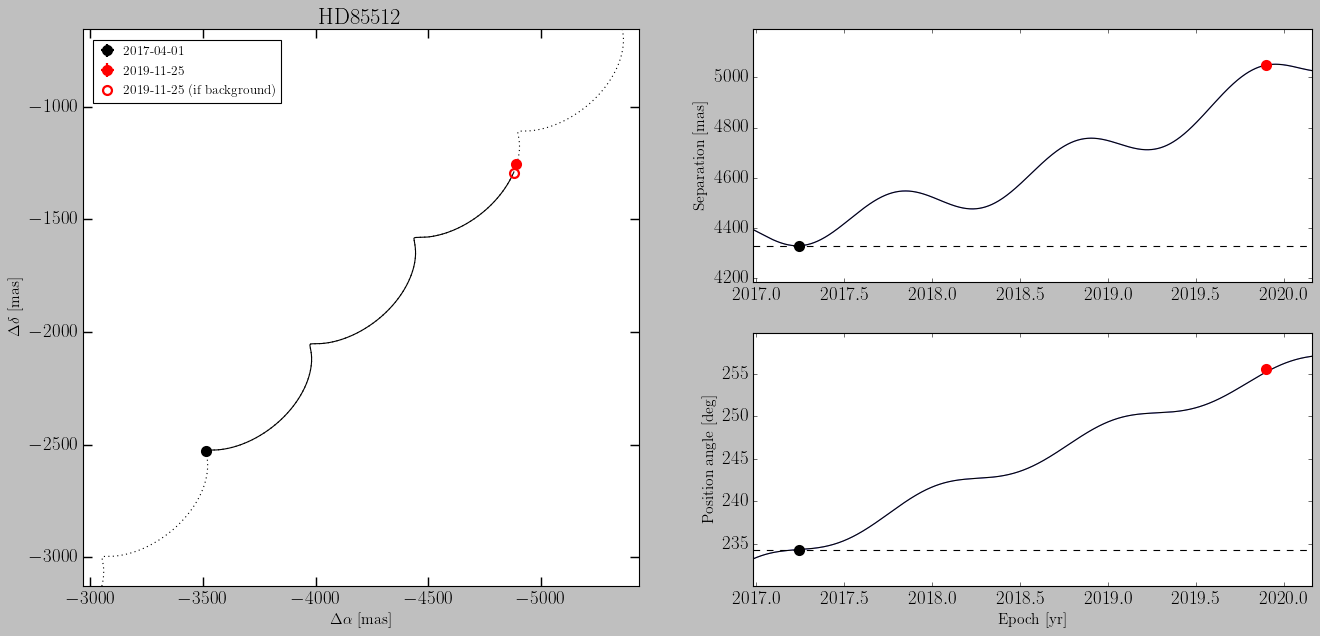

In [11]:
n_epochs = EPOCH.shape[0]

target   = target
dates    = [EPOCH[i][0] for i in range(n_epochs)]
dra      = [RA[i][0] for i in range(n_epochs)]
dra_err  = [RA_ERR[i][0] for i in range(n_epochs)]
ddec     = [DEC[i][0] for i in range(n_epochs)]
ddec_err = [DEC_ERR[i][0] for i in range(n_epochs)]

cond_select_obj = (target==dF_prop['target name'])
plx = float(dF_prop[cond_select_obj]['parallax'])
plx_err = float(dF_prop[cond_select_obj]['err parallax'])
dist = float(dF_prop[cond_select_obj]['distance'])
dist_err = plx_err/plx**2


# load some properties of the star from Simbad
result_table_names = customSimbad.query_object(target)

pm_err_star = np.max([result_table_names['PM_ERR_MAJA'][0],result_table_names['PM_ERR_MINA'][0]])
prop = {
    'ra': result_table_names['RA'][0],
    'dec': result_table_names['DEC'][0],
    'dist': dist,
    'dist_err': dist_err,
    'plx': plx,
    'plx_err': plx_err,
    'pm': [result_table_names['PMRA'][0],result_table_names['PMDEC'][0]],
    'pm_err': [pm_err_star,pm_err_star],
    #'pm_bkg': [-20, -30],
    #'pm_bkg_err': [6.5, 5.8]
}

fig, ax, RA_track, DEC_track, RA_expected_bkg, DEC_expected_bkg = proper_motion.plots(target, dates, 
                        dra, dra_err, ddec, ddec_err, prop, 
                        legend_loc=0, return_tracks=1, return_expected_positions=1)
mise_en_page(ax)
plt.savefig('PMD_{}_overview_{}epochs.pdf'.format(target,n_epochs))

#### Use a reference epoch to plot difference in relative declination vs difference in relative right ascension

In [12]:
#Parameters plot
color_background = 'blue'
color_detection = ['red', 'teal', 'orange', 'purple', 'magenta',  [0.9,0.8,0], 'navy', [0.4,0.4,1], [0.2,1,0.2], [0.5,1,0.5],  'cyan', [0,0,0.5],  [0.5,0,0],  [0.9,0.5,0.9],  [0.2,0.8,1], [0.5,0.5,0.5] , 'forestgreen']

In [13]:
len(color_detection)

17

- More than 1 candidate and than 1 epoch

1


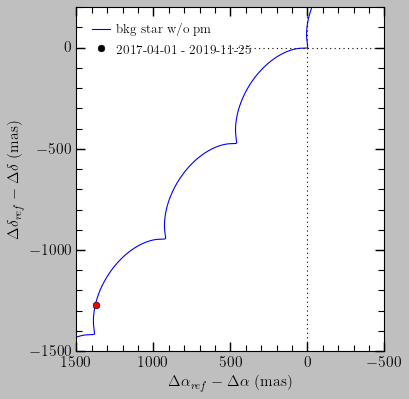

In [15]:
n_epochs = EPOCH.shape[0] ; n_candidates = EPOCH.shape[1]
xlab = r'$\Delta \alpha_{ref} - \Delta \alpha$ (mas)'
ylab = r'$\Delta \delta_{ref} - \Delta \delta$ (mas)'
target   = target
dates    = EPOCH
dra      = RA[1:]
dra_err  = [0]
ddec     = DEC[1:]
ddec_err = [0]

dra_ref      = RA[0]
dra_err_ref  = [0]
ddec_ref     = DEC[0]
ddec_err_ref = [0]

cond_select_obj = (target==dF_prop['target name'])
plx = float(dF_prop[cond_select_obj]['parallax'])
plx_err = float(dF_prop[cond_select_obj]['err parallax'])
dist = float(dF_prop[cond_select_obj]['distance'])
dist_err = plx_err/plx**2


fig, ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(left=0.18,bottom=0.11,top=0.97,right=0.95)
loc = 'upper left' ; add_zoom_text = '' ; marker_epoch = None
yfin_leg = 8000 ; ydeb_leg = -1e4 ; xdeb_leg = 1e4
color=color_detection ; label = ''
add_candidate = 0

axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.67, 0.45, 0.22, 0.22


# special cases : refined images providing the system
if target == 'GJ422' and n_epochs==3:
    xlim, ylim =  [600,-5700], [-600,3000] ; yfin_leg = 1800 #; loc = 'lower left'
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=1000, x_min_step=200, y_maj_step=1000, y_min_step=200)
    marker_epoch = ['o','d']
    add_candidate = 1
    add_zoom = 1
    xlim_zoom, ylim_zoom =  [-4400,-4500], [2150,2300] ;
    x_step_zoom=1; y_step_zoom=1 
    x_maj_step_zoom=50; x_min_step_zoom=10; y_maj_step_zoom=50; y_min_step_zoom=10
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.67, 0.45, 0.22, 0.22
    add_zoom_2 = 1
    axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2 = 0.67, 0.18, 0.22, 0.22
    xlim_zoom2, ylim_zoom2 =  [-4800,-4900], [2300,2400]

    
elif target == 'GJ682' and n_epochs==3:
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=500, x_min_step=100, y_maj_step=500, y_min_step=100)
    marker_epoch = ['o','d']
    xlim, ylim =  [200, -2000], [-2200,200] ; ydeb_leg = -1650 ; loc = 'lower left'
    add_zoom = 1 
    xlim_zoom, ylim_zoom =  [-120,-160], [-70,-35] ;
    x_step_zoom=1; y_step_zoom=1
    x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.68, 0.69, 0.22, 0.22
    add_zoom_2 = 1
    axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2 = 0.68, 0.38, 0.22, 0.22
    xlim_zoom2, ylim_zoom2 =  [-1440,-1490], [-1920,-1860] ;
    
    
elif target == 'HD85512':
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=500, x_min_step=100, y_maj_step=500, y_min_step=100)
    marker_epoch = ['o','o','o','o']
    xlim, ylim =  [1500,-500], [-1500,200] ; xdeb_leg = 550#; ydeb_leg = -1500 ; loc = 'lower left'
    add_zoom = 0
    xlim_zoom, ylim_zoom =  [1395,1370], [-1370,-1250] ;
    x_step_zoom=1; y_step_zoom=1
    x_maj_step_zoom=10; x_min_step_zoom=5; y_maj_step_zoom=50; y_min_step_zoom=10
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.68, 0.46, 0.22, 0.22
    add_zoom_2 = 0
    axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2 = 0.68, 0.18, 0.22, 0.22
    xlim_zoom2, ylim_zoom2 =  [475,460], [-400,-350] ;
    
elif target == 'HD154088':
    xlim, ylim =  [400,-100], [-1200,150] ; xdeb_leg = 70
    marker_epoch = ['o','d']
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=50, x_min_step=10, y_maj_step=100, y_min_step=20)
    add_zoom = 1
    xlim_zoom, ylim_zoom =  [170,110], [-590,-530] ;
    x_step_zoom=1; y_step_zoom=1
    x_maj_step_zoom=40; x_min_step_zoom=10; y_maj_step_zoom=40; y_min_step_zoom=10
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.68, 0.48, 0.22, 0.22 
    add_zoom_2 = 1
    axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2 = 0.68, 0.2, 0.22, 0.22
    xlim_zoom2, ylim_zoom2 =  [380,280], [-1110,-1030] ;

# add background track
ax.plot(RA_track,DEC_track,label='bkg star w/o pm',color=color_background)

# add detections for each epoch
for t in range(1,n_epochs):
    print(t)
    XRA, YDEC = RA[0]-RA[t], DEC[0]-DEC[t]
    
    # ERRORBARS: define global error budget in RA, DEC
    # add the pupil offset error of theta = 0.1 deg; depends on sep (separation) and differs for ra/dec
    RA_ERR_PUPIL  = np.sqrt( (np.sin(theta)*SEP_ERR)**2 + (SEP*np.cos(theta)*theta_err)**2 ) #+ (np.sin(theta)*SEP_ERR[1])**2 + [SEP[1]*np.cos(theta)*theta_err]**2 )   
    DEC_ERR_PUPIL = np.sqrt( (np.cos(theta)*SEP_ERR)**2 + (SEP*np.sin(theta)*theta_err)**2 )  #+ (np.cos(theta)*SEP_ERR[1])**2 + [SEP[1]*np.sin(theta)*theta_err]**2 )   
    # global budget
    XRA_ERR  = np.sqrt(RA_ERR[0]**2+RA_ERR[t]**2+RA_ERR_PUPIL[0]**2+RA_ERR_PUPIL[t]**2)
    YDEC_ERR =  np.sqrt(DEC_ERR[0]**2+DEC_ERR[t]**2+DEC_ERR_PUPIL[0]**2+DEC_ERR_PUPIL[t]**2)

    for i in range(n_candidates):
        if t == 1 and add_candidate : label = 'candidate {}'.format(i+1)
        #ax.text(500,100,text,fontsize=12)
        ax.errorbar(XRA[i],YDEC[i],YDEC_ERR[i],XRA_ERR[i],label=label,
                marker=marker_epoch[t-1],color=color[i],lw=0, elinewidth=1, zorder=10)
    # add epochs in leg
    ax.plot([5e5,5e5],[5e5,5e5],color='black',marker=marker_epoch[t-1],lw=0,label='{} - {}'.format(EPOCH[0,0],EPOCH[t,0]))
    label = ''
    

# add [0,0] reference lines
ax.legend(loc=loc,frameon=False,numpoints=1)
ax.plot([0,0],[ydeb_leg,yfin_leg],ls=':',color='black')
fais_moi_un_subplot(ax,[xdeb_leg,-1e4],[0,0],ls=':',c='black',labx=xlab,laby=ylab)
plt.axis([xlim[0], xlim[1], ylim[0], ylim[1]])
#plt.gca().set_aspect('equal', adjustable='box')
#mise_en_page(ax,x_step=1,y_step=1,x_maj_step=100, x_min_step=20, y_maj_step=100, y_min_step=20)

# add second small plot
if add_zoom :
    add_zoom_text = '_zoom'
    axes2 = fig.add_axes([axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong]) # renvoie un objet Axes       
    #axes2.axis('equal')         
    axes2.patch.set_color([0.99,0.99,0.99])
    fais_moi_un_subplot(axes2,RA_track,DEC_track,c=color_background,fs=10,ls='-') #labx=xlab,laby=ylab
    # add detections for each epoch
    for t in range(1,n_epochs):
        print(t)
        XRA, YDEC = RA[0]-RA[t], DEC[0]-DEC[t]
        
        # ERRORBARS: define global error budget in RA, DEC
        # add the pupil offset error of theta = 0.1 deg; depends on sep (separation) and differs for ra/dec
        RA_ERR_PUPIL  = np.sqrt( (np.sin(theta)*SEP_ERR)**2 + (SEP*np.cos(theta)*theta_err)**2 ) #+ (np.sin(theta)*SEP_ERR[1])**2 + [SEP[1]*np.cos(theta)*theta_err]**2 )   
        DEC_ERR_PUPIL = np.sqrt( (np.cos(theta)*SEP_ERR)**2 + (SEP*np.sin(theta)*theta_err)**2 )  #+ (np.cos(theta)*SEP_ERR[1])**2 + [SEP[1]*np.sin(theta)*theta_err]**2 )   
        # global budget
        XRA_ERR  = np.sqrt(RA_ERR[0]**2+RA_ERR[t]**2+RA_ERR_PUPIL[0]**2+RA_ERR_PUPIL[t]**2)
        YDEC_ERR =  np.sqrt(DEC_ERR[0]**2+DEC_ERR[t]**2+DEC_ERR_PUPIL[0]**2+DEC_ERR_PUPIL[t]**2)
         
        for i in range(n_candidates):
            axes2.errorbar(XRA[i],YDEC[i],YDEC_ERR[i],XRA_ERR[i],label=label,
                    marker=marker_epoch[t-1],color=color[i],lw=0, elinewidth=1, zorder=10)
    axes2.axis([xlim_zoom[0], xlim_zoom[1], ylim_zoom[0], ylim_zoom[1]])
    if target == 'GJ422' and n_epochs == 3 :
        yti_old = [2150,2200,2250,2300]
        yti_new = ['$2150$','$2200$','$2250$','$2300$']
        plt.setp(axes2, yticks=yti_old, yticklabels=yti_new)
    mise_en_page(axes2,x_step=x_step_zoom,y_step=y_step_zoom,x_maj_step=x_maj_step_zoom, x_min_step=x_min_step_zoom, y_maj_step=y_maj_step_zoom, y_min_step=y_min_step_zoom)

if add_zoom_2 :
    add_zoom_text = '_zoom'
    axes2 = fig.add_axes([axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2]) # renvoie un objet Axes       
    #axes2.axis('equal')         
    axes2.patch.set_color([0.99,0.99,0.99])
    fais_moi_un_subplot(axes2,RA_track,DEC_track,c=color_background,ls='-') #labx=xlab,laby=ylab
    # add detections for each epoch
    for t in range(1,n_epochs):
        XRA, YDEC = RA[0]-RA[t], DEC[0]-DEC[t]
        
        # ERRORBARS: define global error budget in RA, DEC
        # add the pupil offset error of theta = 0.1 deg; depends on sep (separation) and differs for ra/dec
        RA_ERR_PUPIL  = np.sqrt( (np.sin(theta)*SEP_ERR)**2 + (SEP*np.cos(theta)*theta_err)**2 ) #+ (np.sin(theta)*SEP_ERR[1])**2 + [SEP[1]*np.cos(theta)*theta_err]**2 )   
        DEC_ERR_PUPIL = np.sqrt( (np.cos(theta)*SEP_ERR)**2 + (SEP*np.sin(theta)*theta_err)**2 )  #+ (np.cos(theta)*SEP_ERR[1])**2 + [SEP[1]*np.sin(theta)*theta_err]**2 )   
        # global budget
        XRA_ERR  = np.sqrt(RA_ERR[0]**2+RA_ERR[t]**2+RA_ERR_PUPIL[0]**2+RA_ERR_PUPIL[t]**2)
        YDEC_ERR =  np.sqrt(DEC_ERR[0]**2+DEC_ERR[t]**2+DEC_ERR_PUPIL[0]**2+DEC_ERR_PUPIL[t]**2)

        for i in range(n_candidates):
            axes2.errorbar(XRA[i],YDEC[i],YDEC_ERR[i],XRA_ERR[i],label=label,
                    marker=marker_epoch[t-1],color=color[i],lw=0, elinewidth=1, zorder=10)

    axes2.axis([xlim_zoom2[0], xlim_zoom2[1], ylim_zoom2[0], ylim_zoom2[1]])
    if target == 'GJ422' and n_epochs == 3 :
        yti_old = [2300,2350,2400]
        yti_new = ['$2300$','$2350$','$2400$']
        plt.setp(axes2, yticks=yti_old, yticklabels=yti_new)
        
    if target == 'GJ682' and n_epochs == 3  :
        xti_old = [-1480,-1460,-1440]
        xti_new = ['$-1480$','$-1460$','$-1440$']
        plt.setp(axes2, xticks=xti_old, xticklabels=xti_new)
        
    if target == 'HD154088' and n_epochs == 3  :
        yti_old = [-1040,-1080]
        yti_new = ['$-1040$','$-1080$']
        plt.setp(axes2, yticks=yti_old, yticklabels=yti_new)
    
    mise_en_page(axes2,x_step=x_step_zoom,y_step=y_step_zoom,x_maj_step=x_maj_step_zoom, x_min_step=x_min_step_zoom, y_maj_step=y_maj_step_zoom, y_min_step=y_min_step_zoom)


plt.savefig('PMD_{}_3epochs{}.pdf'.format(target,add_zoom_text))
plt.savefig('PMD_{}_3epochs{}.png'.format(target,add_zoom_text))

- 2 epochs and at least 1 candidate

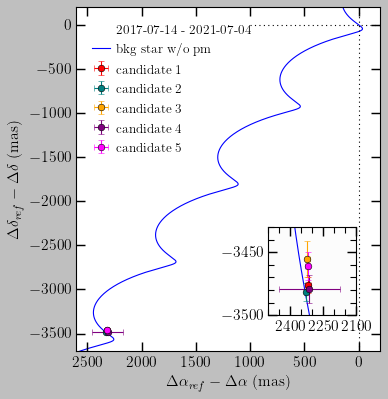

In [55]:
n_epochs = EPOCH.shape[0]
n_candidates = EPOCH.shape[1]

xlab = r'$\Delta \alpha_{ref} - \Delta \alpha$ (mas)'
ylab = r'$\Delta \delta_{ref} - \Delta \delta$ (mas)'
target   = target
dates    = EPOCH
dra      = RA[1:]
dra_err  = [0]
ddec     = DEC[1:]
ddec_err = [0]

dra_ref      = RA[0]  ; dra_err_ref  = [0]
ddec_ref     = DEC[0] ; ddec_err_ref = [0]

cond_select_obj = (target==dF_prop['target name'])
plx = float(dF_prop[cond_select_obj]['parallax'])
plx_err = float(dF_prop[cond_select_obj]['err parallax'])
dist = float(dF_prop[cond_select_obj]['distance'])
dist_err = plx_err/plx**2

# define global error budget in RA, DEC
# add the pupil offset error of theta = 0.1 deg; depends on sep (separation) and differs for ra/dec
# error in ra: dra**2 =  [sin(theta)*dsep]**2 + [sep*cos(theta)*dtheta]**2 
# error in dec: ddec**2 =  [cos(theta)*dsep]**2 + [sep*sin(theta)*dtheta]**2 
theta     = 135.99 * np.pi/180 # 0.1 error pupil offset converted in rad
theta_err = 0.11 * np.pi/180 

# difference of positionf of two candidates so errors have to be taken into account for each candidates (~ x2)
XRA, YDEC = RA[0]-RA[1], DEC[0]-DEC[1]
RA_ERR_PUPIL  = np.sqrt( (np.sin(theta)*SEP_ERR)**2 + (SEP*np.cos(theta)*theta_err)**2 ) #+ (np.sin(theta)*SEP_ERR[1])**2 + [SEP[1]*np.cos(theta)*theta_err]**2 )   
DEC_ERR_PUPIL = np.sqrt( (np.cos(theta)*SEP_ERR)**2 + (SEP*np.sin(theta)*theta_err)**2 )  #+ (np.cos(theta)*SEP_ERR[1])**2 + [SEP[1]*np.sin(theta)*theta_err]**2 )   
# global budget
XRA_ERR  = np.sqrt(RA_ERR[0]**2+RA_ERR[1]**2+RA_ERR_PUPIL[0]**2+RA_ERR_PUPIL[1]**2)
YDEC_ERR =  np.sqrt(DEC_ERR[0]**2+DEC_ERR[1]**2+DEC_ERR_PUPIL[0]**2+DEC_ERR_PUPIL[1]**2)

fig, ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(left=0.18,bottom=0.11,top=0.97,right=0.94)
loc = 'upper left' ; add_zoom_text = '' ; xdeb_leg = 1e4 ;  ydeb_leg = -1e4 ; yfin_leg = 1e4 ; ncol = 1


# mise en page
add_zoom = 0
axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.67, 0.45, 0.22, 0.22
xlim_zoom, ylim_zoom =  [-350,-440], [50,180] ;
x_step_zoom=0; y_step_zoom=0 ; x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
marker = 'o'

ax.plot([500,500],[500,500],color='white',marker=None,label='{} - {}'.format(EPOCH[0,0],EPOCH[1,0]))

# add detections for each epoch
for i in range(n_candidates):
    if target != 'HD154088' :
        label = 'candidate {}'.format(i+1)
    else : 
        marker = 'd'
        if color_detection[i] == 'black' : label = 'candidates'.format(i+1)
        else : label =''
    #ax.text(500,100,text,fontsize=12)
    ax.errorbar(XRA[i],YDEC[i],YDEC_ERR[i],XRA_ERR[i],label=label,
            marker=marker,color=color_detection[i],lw=0, elinewidth=1, zorder=10)

# add background track
ax.plot(RA_track,DEC_track,label='bkg star w/o pm',color=color_background)

#ax.axis('equal')
if target == 'GJ674':
    xlim, ylim =  [2600,-200], [-3700,200] ; xdeb_leg = 1000
    mise_en_page(ax,x_step=0,y_step=0,x_maj_step=50, x_min_step=10, y_maj_step=100, y_min_step=20)
    add_zoom = 1
    xlim_zoom, ylim_zoom =  [2500,2100], [-3500,-3430] ;
    x_step_zoom=1; y_step_zoom=1
    x_maj_step_zoom=150; x_min_step_zoom=50; y_maj_step_zoom=50; y_min_step_zoom=10
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.66, 0.2, 0.22, 0.22
    
if target == 'HD154088':
    xlim, ylim =  [400,-100], [-1200,150] ; xdeb_leg = 100
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=50, x_min_step=10, y_maj_step=100, y_min_step=20)
    add_zoom = 1
    xlim_zoom, ylim_zoom =  [380,280], [-1110,-1030] ;
    x_step_zoom=1; y_step_zoom=1 
    x_maj_step_zoom=40; x_min_step_zoom=10; y_maj_step_zoom=40; y_min_step_zoom=10
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.66, 0.2, 0.22, 0.22

elif target == 'HD136352':
    xlim, ylim =  [600,-4600], [-1000,100] ; ydeb_leg = -360 ; xdeb_leg = 5000 ; loc = 'lower left'
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=1000, x_min_step=200, y_maj_step=200, y_min_step=50)
    add_zoom = 1 ; x_step_zoom=1; y_step_zoom=1
    xlim_zoom, ylim_zoom =  [-4195,-4240], [-790,-740] ;
    x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.69, 0.7, 0.22, 0.22
    
elif target == 'GJ433':
    xlim, ylim =  [200,-300], [-2000,200] ;loc = 'lower left' ; ydeb_leg = -1500
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=100, x_min_step=20, y_maj_step=500, y_min_step=100)
    add_zoom = 1
    xlim_zoom, ylim_zoom =  [-100,-135], [-1680,-1640] ;
    x_step_zoom=1; y_step_zoom=1
    x_maj_step_zoom=10; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.29, 0.6, 0.22, 0.22
    
    
elif target == 'GJ422' and n_epochs==2:
    xlim, ylim =  [100,-1200], [-50,440] ; xdeb_leg = 1000 ; yfin_leg =220#; loc = 'lower left'
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=200, x_min_step=100, y_maj_step=100, y_min_step=20)
    add_zoom = 1
    xlim_zoom, ylim_zoom =  [-350,-440], [50,180] ;
    x_step_zoom=1; y_step_zoom=1 
    x_maj_step_zoom=40; x_min_step_zoom=10; y_maj_step_zoom=40; y_min_step_zoom=10
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.67, 0.25, 0.22, 0.22
    
elif target == 'GJ682' and n_epochs==2:
    xlim, ylim =  [20,-200], [-120,10] ; ydeb_leg = -65 ; loc = 'lower left' ; ncol= 2
    xlim_zoom, ylim_zoom =  [-120,-160], [-70,-35] ;
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=100, x_min_step=20, y_maj_step=20, y_min_step=5)
    x_step_zoom=1; y_step_zoom=1 
    x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.65, 0.7, 0.22, 0.22
    add_zoom = 1

elif target == 'GJ832':
    xlim, ylim =  [50,-200], [-200,50]  ; ydeb_leg = -200 ; loc = 'upper right' ; ncol= 1
    xlim_zoom, ylim_zoom =  [-120,-160], [-70,-35] ;
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=50, x_min_step=10, y_maj_step=50, y_min_step=10)
    x_step_zoom=1; y_step_zoom=1 
    x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.65, 0.7, 0.22, 0.22
    add_zoom = 0
     

# add [0,0] reference lines
ax.legend(loc=loc,frameon=False,numpoints=1,ncol=ncol)
ax.plot([0,0],[ydeb_leg,yfin_leg],ls=':',color='black')
fais_moi_un_subplot(ax,[xdeb_leg,-1e4],[0,0],ls=':',c='black',labx=xlab,laby=ylab)
plt.axis([xlim[0], xlim[1], ylim[0], ylim[1]])
#plt.gca().set_aspect('equal', adjustable='box')
#mise_en_page(ax,x_step=1,y_step=1,x_maj_step=100, x_min_step=20, y_maj_step=100, y_min_step=20)

# add second small plot
if add_zoom :
    add_zoom_text = '_zoom'
    axes2 = fig.add_axes([axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong]) # renvoie un objet Axes       
    #axes2.axis('equal')         
    axes2.patch.set_color([0.99,0.99,0.99])
    fais_moi_un_subplot(axes2,RA_track,DEC_track,c=color_background,ls='-') #labx=xlab,laby=ylab
    # add detections for each epoch
    for i in range(n_candidates):
        axes2.errorbar(XRA[i],YDEC[i],YDEC_ERR[i],XRA_ERR[i],label=label,
            marker='o',color=color_detection[i],lw=0, elinewidth=1, zorder=10)
 
    axes2.axis([xlim_zoom[0], xlim_zoom[1], ylim_zoom[0], ylim_zoom[1]])
    mise_en_page(axes2,x_step=x_step_zoom,y_step=y_step_zoom,x_maj_step=x_maj_step_zoom, x_min_step=x_min_step_zoom, y_maj_step=y_maj_step_zoom, y_min_step=y_min_step_zoom)
    
    if target == 'HD136352' and n_epochs == 2 :
        xti_old = [-4190,-4230,-4210]
        xti_new = ['$-4190$','$-4230$','$-4210$']
        plt.setp(axes2, xticks=xti_old, xticklabels=xti_new)
        
    if target == 'GJ433':
        yti_old = [-1680,-1660,-1640]
        yti_new = ['$-1680$','$-1660$','$-1640$']
        plt.setp(axes2, yticks=yti_old, yticklabels=yti_new)
        
    if target == 'HD154088' and n_epochs == 2  :
        yti_old = [-1040,-1080]
        yti_new = ['$-1040$','$-1080$']
        plt.setp(axes2, yticks=yti_old, yticklabels=yti_new)

plt.savefig('PMD_{}_2epochs{}.pdf'.format(target,add_zoom_text))
plt.savefig('PMD_{}_2epochs{}.png'.format(target,add_zoom_text))

In [ ]:
## general ##


In [47]:
XRA

array([2321.39, 2328.51, 2322.86, 2313.59, 2321.05])

In [44]:
YDEC

array([-3475.89, -3481.54, -3455.25, -3479.11, -3460.65])

In [ ]:
for i in range(n_candidates):
    print('%.2f'%XRA[i], '%.2f'%YDEC[i], 'error', '%.2f'%XRA_ERR[i], '%.2f'%YDEC_ERR[i])

In [80]:
color_detection = 'red'

In [81]:
i=0
print(DEC[0,i]-DEC[1,i])

-93.30000000000001


- More than 2 epochs but only 1 candidate

[[4329.3  4524.83]
 [5047.28 5045.17]]
-0.0013808004886426445
[[6.00700022 6.26844015]
 [6.99141622 6.99956887]]
[[8.5559864  8.96827095]
 [9.28374668 9.4702168 ]]


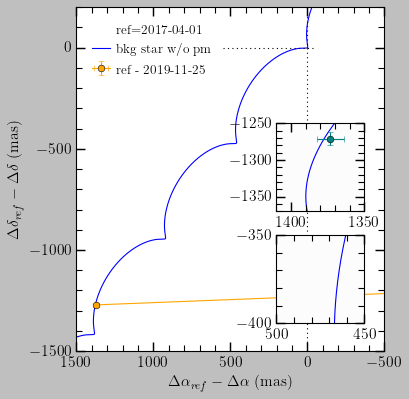

In [22]:
add_zoom = 1 

xlab = r'$\Delta \alpha_{ref} - \Delta \alpha$ (mas)'
ylab = r'$\Delta \delta_{ref} - \Delta \delta$ (mas)'
target   = target
dates    = EPOCH

dra_ref      = RA[0]  ; dra_err_ref  = RA_ERR[0]
ddec_ref     = DEC[0] ; ddec_err_ref = DEC_ERR[0]

XRA,YDEC = dra_ref-RA, ddec_ref-DEC

# ERRORBARS: define global error budget in RA, DEC
print(SEP)
# add the pupil offset error of theta = 0.1 deg; depends on sep (separation) and differs for ra/dec
RA_ERR_PUPIL  = np.sqrt( (np.sin(theta)*SEP_ERR)**2 + (SEP*np.cos(theta)*theta_err)**2 ) #+ (np.sin(theta)*SEP_ERR[1])**2 + [SEP[1]*np.cos(theta)*theta_err]**2 )   
DEC_ERR_PUPIL = np.sqrt( (np.cos(theta)*SEP_ERR)**2 + (SEP*np.sin(theta)*theta_err)**2 )  #+ (np.cos(theta)*SEP_ERR[1])**2 + [SEP[1]*np.sin(theta)*theta_err]**2 )   
# global budget
XRA_ERR  = np.sqrt(RA_ERR[0]**2+RA_ERR**2+RA_ERR_PUPIL[0]**2+RA_ERR_PUPIL**2)
YDEC_ERR =  np.sqrt(DEC_ERR[0]**2+DEC_ERR**2+DEC_ERR_PUPIL[0]**2+DEC_ERR_PUPIL**2)

print(np.cos(theta)*theta_err)
print(RA_ERR_PUPIL)
print(XRA_ERR)


cond_select_obj = (target==dF_prop['target name'])
plx = float(dF_prop[cond_select_obj]['parallax'])
plx_err = float(dF_prop[cond_select_obj]['err parallax'])
dist = float(dF_prop[cond_select_obj]['distance'])
dist_err = plx_err/plx**2

fig, ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(left=0.18,bottom=0.11,top=0.97,right=0.95)
plot_expected_positions_bkg=0 ;  xfin_leg = -50;

ax.plot([500,500],[500,500],color='white',marker=None,label='ref={}'.format(EPOCH[0,0]))
# add detections for each epoch
n = len(RA) ; RSM = 1
if target == 'GJ832' and not RSM:
    n = 2
for i in range(1,n):
    label = 'ref - {1}'.format(EPOCH[0,0],EPOCH[i,0])
    ax.errorbar(XRA[i],YDEC[i],YDEC_ERR[i],XRA_ERR[i],label=label,
            marker='o',color=color_detection[i+1],lw=1, zorder=10,elinewidth=1)
    
if target == 'HD85512':
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=500, x_min_step=100, y_maj_step=500, y_min_step=100)
    marker_epoch = ['o','d']
    xlim, ylim =  [1500,-500], [-1500,200] ; xdeb_leg = 550; loc ='upper left'#; ydeb_leg = -1500 ; loc = 'lower left'
    add_zoom = 1
    xlim_zoom, ylim_zoom =  [1410,1360], [-1370,-1250] ;
    x_step_zoom=1; y_step_zoom=1
    x_maj_step_zoom=50; x_min_step_zoom=10; y_maj_step_zoom=50; y_min_step_zoom=10
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.68, 0.46, 0.22, 0.22
    add_zoom_2 = 1
    axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2 = 0.68, 0.18, 0.22, 0.22
    xlim_zoom2, ylim_zoom2 =  [500,450], [-400,-350] ;
    
elif target == 'GJ832':
    xlim, ylim =  [200,-100], [-200,50]  ; xdeb_leg = 30 ; xfin_leg = -200 ; yfin_leg = -80 ; ydeb_leg = -200 ; loc = 'upper left' ; ncol= 1
    xlim_zoom, ylim_zoom =  [-120,-160], [-70,-35] ;
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=50, x_min_step=10, y_maj_step=50, y_min_step=10)
    x_step_zoom=1; y_step_zoom=1 
    x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.65, 0.7, 0.22, 0.22
    add_zoom = 0 ; add_zoom_2 = 0 ; plot_expected_positions_bkg = 1
    
elif target == 'GJ832' and 1: # RSM
    xlim, ylim =  [400,-100], [-200,50]  ; xdeb_leg = 30 ; xfin_leg = -200 ; yfin_leg = -80 ; ydeb_leg = -200 ; loc = 'upper left' ; ncol= 1
    xlim_zoom, ylim_zoom =  [-120,-160], [-70,-35] ;
    mise_en_page(ax,x_step=1,y_step=1,x_maj_step=50, x_min_step=10, y_maj_step=50, y_min_step=10)
    x_step_zoom=1; y_step_zoom=1 
    x_maj_step_zoom=20; x_min_step_zoom=5; y_maj_step_zoom=20; y_min_step_zoom=5
    axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong = 0.65, 0.7, 0.22, 0.22
    add_zoom = 0 ; add_zoom_2 = 0 ; plot_expected_positions_bkg = 1
     

if plot_expected_positions_bkg: 
    XRA_expected_bkg,YDEC_expected_bkg = dra_ref-RA_expected_bkg, ddec_ref-DEC_expected_bkg
    for i in range(len(RA_expected_bkg)):
        label = 'ref - {1} (if bkg)'.format(EPOCH[0,0],EPOCH[1+i,0])
        ax.plot(XRA_expected_bkg[i],YDEC_expected_bkg[i],label=label,
                marker='o',color=color_detection[2+i],lw=1, zorder=10)
        
# add background track
ax.plot(RA_track,DEC_track,label='bkg star w/o pm',color=color_background)
# add [0,0] reference lines
ax.plot([0,0],[-1e4,1e3],ls=':',color='black')
fais_moi_un_subplot(ax,[xdeb_leg,xfin_leg],[0,0],ls=':',c='black',labx=xlab,laby=ylab)
ax.legend(loc=loc,frameon=False,numpoints=1)
#ax.axis('equal')
plt.axis([xlim[0], xlim[1], ylim[0], ylim[1]])
#plt.gca().set_aspect('equal', adjustable='box')
#mise_en_page(ax,x_step=1,y_step=1,x_maj_step=500, x_min_step=100,y_maj_step=500, y_min_step=100)

legend_without_duplicate_labels(ax,loc=loc,frameon=False,numpoints=1)
    
# add second small plot
if add_zoom :
    add_zoom_text = '_zoom'
    axes2 = fig.add_axes([axes2_xdeb,axes2_ydeb, axes2_xlong,axes2_ylong]) # renvoie un objet Axes       
    #axes2.axis('equal')         
    axes2.patch.set_color([0.99,0.99,0.99])
    fais_moi_un_subplot(axes2,RA_track,DEC_track,c=color_background,ls='-') #labx=xlab,laby=ylab
    # add detections for each epoch
    for i in range(1,len(RA)):
        axes2.errorbar(XRA[i],YDEC[i],YDEC_ERR[i],XRA_ERR[i],label=label,
                marker='o',color=color_detection[i],lw=0, elinewidth=1, zorder=10)

    axes2.axis([xlim_zoom[0], xlim_zoom[1], ylim_zoom[0], ylim_zoom[1]])
    mise_en_page(axes2,x_step=x_step_zoom,y_step=y_step_zoom,x_maj_step=x_maj_step_zoom, x_min_step=x_min_step_zoom, y_maj_step=y_maj_step_zoom, y_min_step=y_min_step_zoom)
    if target == 'HD85512' :
        xti_old = [1400,1350]
        xti_new = ['$1400$','$1350$']
        plt.setp(axes2, xticks=xti_old, xticklabels=xti_new)
    
    
if add_zoom_2 :
    add_zoom_text = '_zoom'
    axes2 = fig.add_axes([axes2_xdeb2,axes2_ydeb2, axes2_xlong2,axes2_ylong2]) # renvoie un objet Axes       
    #axes2.axis('equal')         
    axes2.patch.set_color([0.99,0.99,0.99])
    fais_moi_un_subplot(axes2,RA_track,DEC_track,c=color_background,ls='-') #labx=xlab,laby=ylab
    # add detections for each epoch
    for i in range(1,len(RA)):
        axes2.errorbar(XRA[i],YDEC[i],YDEC_ERR[i],XRA_ERR[i],label=label,
                marker='o',color=color_detection[i],lw=0, elinewidth=1, zorder=10)

    axes2.axis([xlim_zoom2[0], xlim_zoom2[1], ylim_zoom2[0], ylim_zoom2[1]])
    mise_en_page(axes2,x_step=x_step_zoom,y_step=y_step_zoom,x_maj_step=x_maj_step_zoom, x_min_step=x_min_step_zoom, y_maj_step=y_maj_step_zoom, y_min_step=y_min_step_zoom)

    
plt.savefig('PMD_{}_{}epochs{}.pdf'.format(target,len(EPOCH),add_zoom_text))
plt.savefig('PMD_{}_{}epochs{}.png'.format(target,len(EPOCH),add_zoom_text))

In [19]:
target

'HD85512'

In [20]:
RA_ERR_PUPIL

array([[6.00700022, 6.26844015],
       [6.99141622, 6.99956887]])

In [68]:
RA_expected_bkg

[-444.67275541359226, -431.38399044378843, -416.66708247498497]

In [38]:
print(dra_ref, ddec_ref)

-444.67275541359226 302.1698353611517


In [55]:
print(XRA_expected_bkg+dra_ref)
print(YDEC_expected_bkg+ddec_ref)

[-517.72724459 -531.01600956 -545.73291753]
[93.23016464 67.51056332 42.20296998]


In [56]:
print(RA_expected_bkg)
print(DEC_expected_bkg)

[-444.67275541359226, -431.38399044378843, -416.66708247498497]
[302.1698353611517, 327.8894366819021, 353.19703001833506]


In [31]:
XRA_expected_bkg,YDEC_expected_bkg 

(array([  0.        , -13.28876497, -28.00567294]),
 array([  0.        , -25.71960132, -51.02719466]))

In [34]:
XRA,YDEC

(array([[  0. ],
        [-52.2],
        [-52.2],
        [-52.2]]),
 array([[  0. ],
        [-93.3],
        [-93.3],
        [-93.3]]))

In [32]:
RA_expected_bkg

[-444.67275541359226, -431.38399044378843, -416.66708247498497]

In [ ]:
for i in range (1,3):
    print(dra_ref-RA[i],ddec_ref-DEC[i])

- PMD basic : shows 1 candidate between 2 epochs

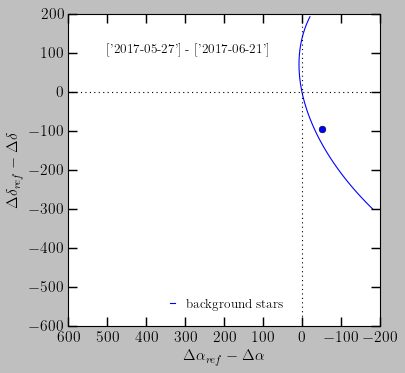

In [84]:
xlab = r'$\Delta \alpha_{ref} - \Delta \alpha$'
ylab = r'$\Delta \delta_{ref} - \Delta \delta$'
target   = target
dates    = EPOCH[:2]
dra      = RA[1]
dra_err  = [0]
ddec     = DEC[1]
ddec_err = [0]

dra_ref      = RA[0]
dra_err_ref  = [0]
ddec_ref     = DEC[0]
ddec_err_ref = [0]

cond_select_obj = (target==dF_prop['target name'])
plx = float(dF_prop[cond_select_obj]['parallax'])
plx_err = float(dF_prop[cond_select_obj]['err parallax'])
dist = float(dF_prop[cond_select_obj]['distance'])
dist_err = plx_err/plx**2

fig, ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(left=0.17,bottom=0.15,top=0.95,right=0.95)

text = '{} - {}'.format(EPOCH[0],EPOCH[1])
color_background = 'blue'
ax.text(500,100,text,fontsize=12)
xlim, ylim =  [1000,-4200], [-3000,1000]
ax.axis('equal')
ax.plot(RA_track,DEC_track,label='background stars',color=color_background)
ax.plot(dra_ref-dra,ddec_ref-ddec,marker='o',color=color_background)
ax.plot([0,0],[-1e4,1e3],ls=':',color='black')
fais_moi_un_subplot(ax,[-1e4,1e3],[0,0],ls=':',c='black',labx=xlab,laby=ylab)

ax.legend(loc='lower center',frameon=False)
xlim, ylim =  [600,-200], [-600,200]
plt.axis([xlim[0], xlim[1], ylim[0], ylim[1]])
plt.gca().set_aspect('equal', adjustable='box')
mise_en_page(ax)
plt.savefig('{}_difference_epochs_{}_{}_allH23.pdf'.format(target,EPOCH[0],EPOCH[1]))

=====================================================================================================================

## Extra: Prepare tables

#### Print list of the targets

In [ ]:
for i in range(len(dF_prop)):
    parallax_star = PARALLAX[i]*1e-3 ; parallax_err_star = PARALLAX_ERR[i]*1e-3
    mag_H, mag_K =MAG_STAR_H[i], MAG_STAR_K[i]
    target = NAME_OBJ[i]
    d_star = 1/parallax_star
    d_err_star = parallax_err_star/parallax_star**2
    print(target, '&' #'& %.2f'% (parallax_star*1e3), '\pm %.2f'% (parallax_err_star*1e3),'& %.2f'% d_star,
          #'& %.2f'% mag_H, '& %.2f'% mag_K
         )
          #, '& %.2f'% d_err_star)

#### Print list of the detections

In [ ]:
NIGHT_OBS = np.array(dF_obs['night_obs'])
NAME_OBJ_obs  = np.array(dF_obs['target name'])
FILTER_IRDIS_OBS = np.array(dF_obs['IRDIS filter'])
FILTER_IFS_OBS = np.array(dF_obs['IFS disperser'])
for i in range(len(dF_prop)):
    target = NAME_OBJ[i]
    i_selected = (NAME_OBJ_obs == target)
    dF_obs_1target = dF_obs[i_selected]
    for k in range(len(NIGHT_OBS[i_selected])):
        night_obs = NIGHT_OBS[i_selected][k]
        filt_ird = FILTER_IRDIS_OBS[i_selected][k][2:]
        filt_ifs = FILTER_IFS_OBS[i_selected][k][4:]
        if k % 2 == 0 : # IRDIS
            print(target,'&',night_obs,'&',filt_ird,'&')
        else : # IFS
            print(target,'&',night_obs,'&',filt_ifs,'&')
    #print(target, '&' #'& %.2f'% (parallax_star*1e3), '\pm %.2f'% (parallax_err_star*1e3),'& %.2f'% d_star,
          #'& %.2f'% mag_H, '& %.2f'% mag_K
    #     )
          #, '& %.2f'% d_err_star)

## Extra: tests

In [89]:
# # TEST CONVENTION ANDROMEDA CHARAC ON HD85512 # #
# compare with SpeCal charac results
# print('RA:\n', RA_all[0][0] , '\n', RA_all[1][-1], '\nDEC:\n', DEC_all[0][0],'\n', DEC_all[1][-1])
"""
pixarc = pixarc_ird
EPOCH_all = np.array(['2017-12-30','2019-11-25'])
X_all, Y_all = np.array([837,911]), np.array([332,409])
RA_all, DEC_all = -(X_all - 511.5)*pixarc, (Y_all - 511.5)*pixarc # add minus before RA_all
RA_ERR_all, DEC_ERR_all = np.array([7,7]), np.array([7,7])
SEP_all = np.sqrt(RA_all**2 + DEC_all**2)
SEP_ERR_all = np.sqrt(RA_ERR_all**2 + DEC_ERR_all**2)
print('RA:', RA_all , '\nDEC:', DEC_all) 
"""

"\npixarc = pixarc_ird\nEPOCH_all = np.array(['2017-12-30','2019-11-25'])\nX_all, Y_all = np.array([837,911]), np.array([332,409])\nRA_all, DEC_all = -(X_all - 511.5)*pixarc, (Y_all - 511.5)*pixarc # add minus before RA_all\nRA_ERR_all, DEC_ERR_all = np.array([7,7]), np.array([7,7])\nSEP_all = np.sqrt(RA_all**2 + DEC_all**2)\nSEP_ERR_all = np.sqrt(RA_ERR_all**2 + DEC_ERR_all**2)\nprint('RA:', RA_all , '\nDEC:', DEC_all) \n"

In [ ]:
# find dra/ddec 
## ex: H23 1st epoch K12 2nd epoch
k = 1
diffX = X_all[1][0]-X_all[0][0]
print('diffX',diffX,X_all[1][k] - diffX)
diffY = Y_all[1][0]-Y_all[0][0]
print('diffY',diffY,Y_all[1][k]- diffY)
#